In [1]:
# Checks:
!which python

/home/haruyaishikawa/anaconda3/envs/chainer/bin/python


In [2]:
# general
import cv2
import math
import time
import numpy as np
from pprint import pprint
import sys
from matplotlib import pyplot as plt

# chainer
import chainer

In [3]:
sys.path.insert(0, '../openpose')  # append path of openpose
sys.path.insert(0, '../openpose/data')  # append path of data

In [4]:
from pose_detector import PoseDetector, draw_person_pose
from entity import params, JointType

## Flow

In [5]:
# Chainer config
chainer.config.enable_backprop = False
chainer.config.train = False

chainer.config.show()

autotune              False
cudnn_deterministic   False
debug                 False
enable_backprop       False
keep_graph_on_report  False
lazy_grad_sum         False
train                 False
type_check            True
use_cudnn             auto
use_cudnn_tensor_core auto
use_ideep             never


In [7]:
# load model
# Defaults:
#    arch       : Need to be set
#    weight_file: Need to be set
#    device     : gpu=0
#    precise    : False

pose_detector = PoseDetector('posenet', '../openpose/models/coco_posenet.npz', device=0, precise=True)

print("success!")

Loading the model...
success!


In [8]:
# helper functions:

def show_rgb(img):
    '''OpenCV visualization in Jupyter Notebook'''
    # convert to rgb format
    rgb_img = img[:,:,::-1]
    %matplotlib notebook
    plt.imshow(rgb_img, interpolation='none')


height:  409 width:  640


<IPython.core.display.Javascript object>


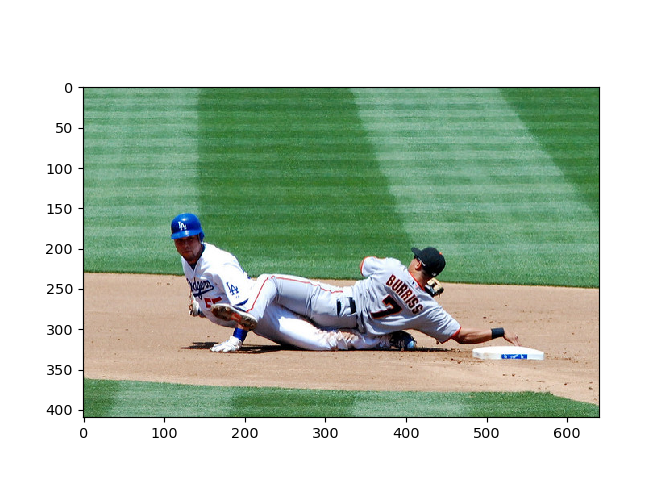

In [9]:
# read image
img = cv2.imread("../openpose/data/baseball.jpg")

h, w = img.shape[:2]
print("height: ", h,"width: ", w)
    
show_rgb(img)
    
# inference
poses, scores = pose_detector(img)

In [10]:
pprint(poses)

array([[[127., 195.,   2.],
        [148., 217.,   2.],
        [128., 212.,   2.],
        [142., 246.,   2.],
        [139., 266.,   2.],
        [165., 223.,   2.],
        [205., 271.,   2.],
        [190., 312.,   2.],
        [195., 275.,   2.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [217., 278.,   2.],
        [158., 264.,   2.],
        [  0.,   0.,   0.],
        [120., 189.,   2.],
        [133., 187.,   2.],
        [114., 191.,   2.],
        [144., 185.,   2.]],

       [[435., 241.,   2.],
        [404., 246.,   2.],
        [428., 272.,   2.],
        [471., 307.,   2.],
        [520., 302.,   2.],
        [383., 221.,   2.],
        [350., 217.,   2.],
        [355., 231.,   2.],
        [335., 289.,   2.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [312., 264.,   2.],
        [228., 240.,   2.],
        [210., 283.,   2.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [434., 233.,   2.],
        [416., 217

<IPython.core.display.Javascript object>


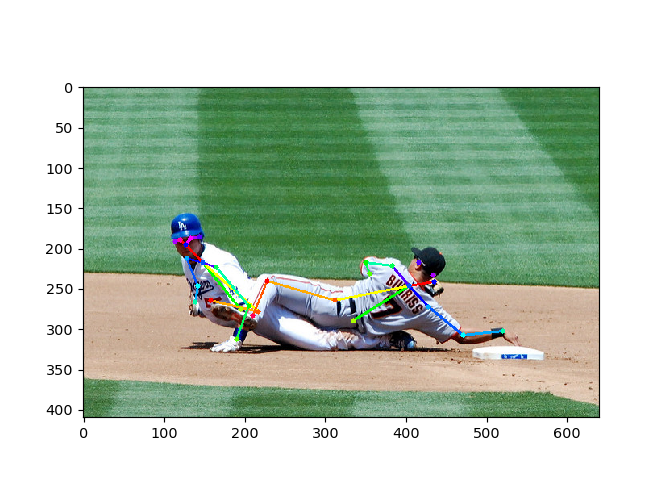

In [11]:
# draw and connect the joints in pose
img = draw_person_pose(img, poses)
show_rgb(img)

In [12]:
# JointType
for i, joint in enumerate(JointType):
    print(i, joint)

0 JointType.Nose
1 JointType.Neck
2 JointType.RightShoulder
3 JointType.RightElbow
4 JointType.RightHand
5 JointType.LeftShoulder
6 JointType.LeftElbow
7 JointType.LeftHand
8 JointType.RightWaist
9 JointType.RightKnee
10 JointType.RightFoot
11 JointType.LeftWaist
12 JointType.LeftKnee
13 JointType.LeftFoot
14 JointType.RightEye
15 JointType.LeftEye
16 JointType.RightEar
17 JointType.LeftEar


In [13]:
# analysis:
human1 = poses[0]

# how to get particular joints location
# output is an array: [x, y, score] 
# x, y are pixel locations

# example:
human1[JointType.Nose]

array([127., 195.,   2.])

#TODO: what should the joint data be for storage?

1. save the array by itself
    - all images that I'll use is VGA formats
    - 

2.